# Import Data

In [72]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
new_df = pd.read_csv('Datasets/final_data_trans_outliers.csv', index_col=0)
new_df.shape

(140787, 43)

# Train Test Split

In [62]:
# Fucntion to split data into train and test data
def tt_split(df):
    X = df.drop(['RainTomorrow'], axis=1)
    y = df['RainTomorrow']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test

# Split training data into train and test data
model_df = new_df.drop(['Date', 'Location', 'Lat_Lon'], axis=1)
X_train, X_test, y_train, y_test = tt_split(model_df)

X_train.shape, X_test.shape

((112629, 39), (28158, 39))

# Standard Scalar

In [63]:
# Function to apply standard scalar
def std_sclr(df):
    scale = StandardScaler()
    trans = scale.fit_transform(df)
    return pd.DataFrame(trans, columns=df.columns)

# Scale train and holdout data
model_df_scl = std_sclr(model_df.drop('RainTomorrow', axis=1))

# Scale train and test data
X_train_scl = std_sclr(X_train)
X_test_scl = std_sclr(X_test)

# SMOTE

In [64]:
# Function to perform SMOTE balancing
def smt(X_train, y_train):
    smt = SMOTE(n_jobs=-1, random_state=1)
    X_smt, y_smt = smt.fit_sample(X_train, y_train)
    return X_smt, y_smt

# Perform SMOTE balancing on train and scaled train data
X_smt, y_smt = smt(model_df.drop('RainTomorrow', axis=1), model_df['RainTomorrow'])
X_smt_scl, y_smt_scl = smt(model_df_scl, model_df['RainTomorrow'])

# Perform SMOTE balancing on train and scaled train data
X_train_smt, y_train_smt = smt(X_train, y_train)
X_train_smt_scl, y_train_smt_scl = smt(X_train_scl, y_train)

X_smt.shape, X_train_smt.shape

((219172, 39), (175218, 39))

# Dummy Classifier

In [34]:
# Function to fit a dummy classifier model
def dmy(X_train, y_train):
    dmy = DummyClassifier()
    dmy_fit = dmy.fit(X_train, y_train)
    return dmy_fit

In [35]:
# Fit dummy classifier model on train data, predict on test data
dmy_fit = dmy(X_train, y_train)
dmy_pred = dmy_fit.predict(X_test)

# F1 score of dummy classifier predictions
f1_score(dmy_pred, y_test)

0.22215077961742485

# Logistic Regression

In [36]:
# Function to fit a logistic regression model
def lr(X_train, y_train):
    lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')
    lr_fit = lr.fit(X_train, y_train)
    return lr_fit

In [46]:
# Fit logistic regression model on train data, predict on test data
lr_fit = lr(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

# Scoring of logistic regression predictions
accuracy_score(lr_pred, y_test), precision_score(lr_pred, y_test), f1_score(lr_pred, y_test)

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.8481426237658924, 0.5007280375343796, 0.5914389451557425)

In [47]:
# Fit logistic regression model on scaled train data, predict on scaled test data
lr_fit_scl = lr(X_train_scl, y_train)
lr_pred_scl = lr_fit_scl.predict(X_test_scl)

# F1 score of scaled logistic regression predictions
accuracy_score(lr_pred_scl, y_test), precision_score(lr_pred_scl, y_test), f1_score(
    lr_pred_scl, y_test)

(0.8487818737126216, 0.506875910046918, 0.595400988217408)

In [48]:
# Fit logistic regression model on SMOTE train data, predict on SMOTE test data
lr_fit_smt = lr(X_train_smt, y_train_smt)
lr_pred_smt = lr_fit_smt.predict(X_test)

# F1 score of scaled logistic regression predictions
accuracy_score(lr_pred_smt, y_test), precision_score(lr_pred_smt, y_test), f1_score(
    lr_pred_smt, y_test)

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.8207259038283969, 0.5725610742598285, 0.5837044367474848)

In [49]:
# Fit logistic regression model on scaled SMOTE train data, predict on scaled SMOTE test data
lr_fit_smt_scl = lr(X_train_smt_scl, y_train_smt_scl)
lr_pred_smt_scl = lr_fit_smt_scl.predict(X_test)

# F1 score of scaled SMOTE logistic regression predictions
accuracy_score(lr_pred_smt_scl, y_test), precision_score(lr_pred_smt_scl, y_test), f1_score(
    lr_pred_smt_scl, y_test)

(0.7804886710703886, 0.0, 0.0)

# Random Forest

In [52]:
# Function to fit a random forest model
def rf(X_train, y_train):
    rf = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=1000, oob_score=True)
    rf_fit = rf.fit(X_train, y_train)
    return rf_fit

# Fit random forest model on SMOTE train data, predict on SMOTE test data
rf_fit_smt = rf(X_train_smt, y_train_smt)
rf_pred_smt = rf_fit_smt.predict(X_test)

# F1 score of scaled random forest predictions
accuracy_score(rf_pred_smt, y_test), precision_score(rf_pred_smt, y_test), f1_score(
    rf_pred_smt, y_test)

In [52]:
# Function to fit a random forest model
def rf(X_train, y_train):
    rf = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=1000, oob_score=True)
    rf_fit = rf.fit(X_train, y_train)
    return rf_fit

In [53]:
# Fit random forest model on train data, predict on test data
rf_fit = rf(X_train, y_train)
rf_pred = rf_fit.predict(X_test)

# F1 score of random forest predictions
accuracy_score(rf_pred, y_test), precision_score(rf_pred, y_test), f1_score(rf_pred, y_test)

(0.8623126642517224, 0.5199805856657499, 0.6237748665696264)

In [54]:
# Fit random forest model on scaled train data, predict on scaled test data
rf_fit_scl = rf(X_train_scl, y_train)
rf_pred_scl = rf_fit.predict(X_test_scl)

# F1 score of scaled random forest predictions
accuracy_score(rf_pred_scl, y_test), precision_score(rf_pred_scl, y_test), f1_score(
    rf_pred_scl, y_test)

(0.7445841323957667, 0.2552984953890956, 0.30498647081561653)

In [55]:
# Fit random forest model on SMOTE train data, predict on SMOTE test data
rf_fit_smt = rf(X_train_smt, y_train_smt)
rf_pred_smt = rf_fit_smt.predict(X_test)

# F1 score of scaled random forest predictions
accuracy_score(rf_pred_smt, y_test), precision_score(rf_pred_smt, y_test), f1_score(
    rf_pred_smt, y_test)

(0.8573407202216067, 0.6181847597476137, 0.6554593018269148)

In [56]:
# Fit random forest model on scaled SMOTE train data, predict on scaled SMOTE test data
rf_fit_smt_scl = rf(X_train_smt_scl, y_train_smt_scl)
rf_pred_smt_scl = rf_fit_smt_scl.predict(X_test_scl)

# F1 score of scaled SMOTE random forest predictions
accuracy_score(rf_pred_smt_scl, y_test), precision_score(rf_pred_smt_scl, y_test), f1_score(
    rf_pred_smt_scl, y_test)

(0.47190851622984586, 0.9310791134120693, 0.43631539044730855)

In [102]:
rf_feat_imp = pd.Series(rf_fit_smt.feature_importances_, index=X_train.columns).sort_values()

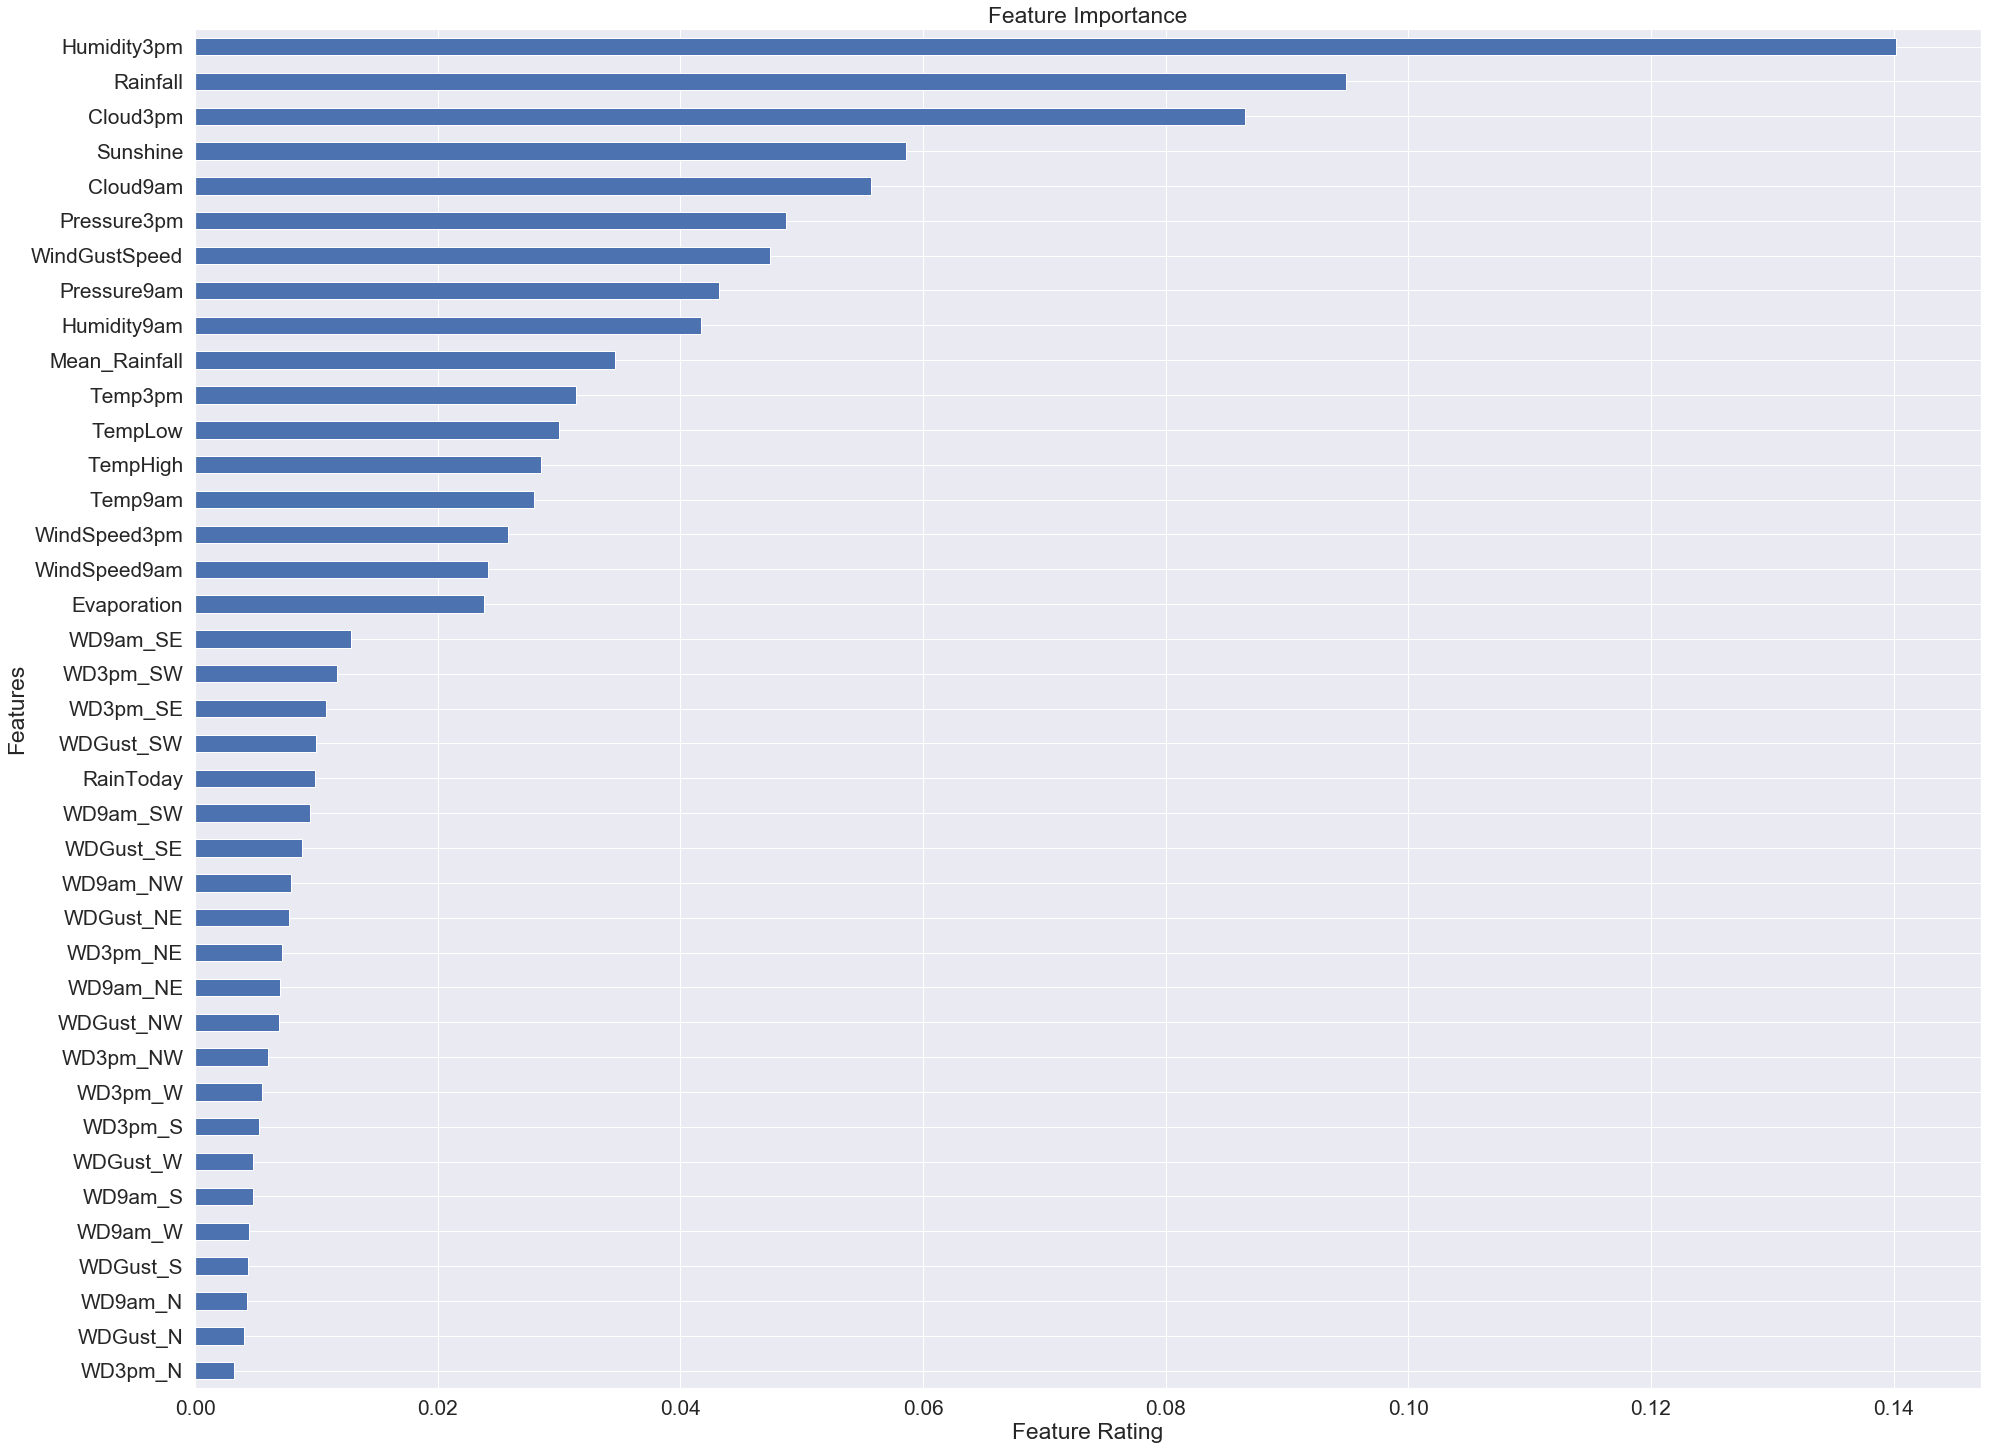

In [105]:
fig, ax = plt.subplots(figsize=(32,25))
ax = rf_feat_imp.plot(kind='barh')
ax.set()


# ax = sns.barplot(x='Mean_Rainfall', y='Location', data=new_df)
sns.set(font_scale=1.9)
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Feature Rating')
# plt.savefig('rf_feat_imp.png', dpi = 100)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [ ]:
>>> features = iris['feature_names']
>>> importances = rnd_clf.feature_importances_
>>> indices = np.argsort(importances)
>>> plt.title('Feature Importances')
>>> plt.barh(range(len(indices)), importances[indices], color='b', align='center')
>>> plt.yticks(range(len(indices)), [features[i] for i in indices])
>>> plt.xlabel('Relative Importance')
>>> plt.show()



# Gaussian Naive Bayes

In [57]:
# Function to fit naive bayes model
def nb(X_train, y_train):
    nb = GaussianNB()
    nb_fit = nb.fit(X_train, y_train)
    return nb_fit

In [58]:
# Fit naive bayes model on train data, predict on test data
nb_fit = nb(X_train, y_train)
nb_pred = nb_fit.predict(X_test)

# F1 score of naive bayes predictions
accuracy_score(nb_pred, y_test), precision_score(nb_pred, y_test), f1_score(nb_pred, y_test)

(0.7954755309325946, 0.6542630642290892, 0.5840976384776486)

In [59]:
# Fit naive bayes model on scaled train data, predict on test data
nb_fit_scl = nb(X_train_scl, y_train)
nb_pred_scl = nb_fit_scl.predict(X_test_scl)

# F1 score of scaled naive bayes predictions
accuracy_score(nb_pred_scl, y_test), precision_score(nb_pred_scl, y_test), f1_score(
    nb_pred_scl, y_test)

(0.7952624476170183, 0.6555573531790972, 0.5843247530463624)

In [60]:
# Fit naive bayes model on SMOTE train data, predict on test data
nb_fit_smt = nb(X_train_smt, y_train_smt)
nb_pred_smt = nb_fit_smt.predict(X_test)

# F1 score of SMOTE naive bayes predictions
accuracy_score(nb_pred_smt, y_test), precision_score(nb_pred_smt, y_test), f1_score(
    nb_pred_smt, y_test)

(0.777505504652319, 0.49231515935932696, 0.4927536231884058)

In [61]:
# Fit naive bayes model on scaled SMOTE train data, predict on test data
nb_fit_smt_scl = nb(X_train_smt_scl, y_train_smt_scl)
nb_pred_smt_scl = nb_fit_smt_scl.predict(X_test_scl)

# F1 score of scaled SMOTE naive bayes predictions
accuracy_score(nb_pred_smt_scl, y_test), precision_score(nb_pred_smt_scl, y_test), f1_score(
    nb_pred_smt_scl, y_test)

(0.7643298529725122, 0.7322439734670765, 0.5770015298317185)

# Ensemble Voting

In [81]:
# Define voting ensemble
ens_lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')
ens_rf = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=1000, oob_score=True)
ens_nb = GaussianNB()

ens_estimators = [('lr', ens_lr), ('rf', ens_rf), ('nb', ens_nb)]
ens_vote = VotingClassifier(estimators=ens_estimators, n_jobs=-1)

In [88]:
# Fit voting ensemble on train data, predict on test data
ens_vote_fit = ens_vote.fit(X_train, y_train)
ens_vote_preds = ens_vote_fit.predict(X_test)

# F1 score of voting ensemble
accuracy_score(ens_vote_preds, y_test), precision_score(ens_vote_preds, y_test), f1_score(
    ens_vote_preds, y_test)

(0.8561332481000071, 0.5424688561721405, 0.623408013386632)

In [89]:
# Fit voting ensemble on scaled train data, predict on scaled test data
ens_vote_fit_scl = ens_vote.fit(X_train_scl, y_train)
ens_vote_preds_scl = ens_vote_fit_scl.predict(X_test_scl)

# F1 score of scaled voting ensemble
accuracy_score(ens_vote_preds_scl, y_test), precision_score(
    ens_vote_preds_scl, y_test), f1_score(ens_vote_preds_scl, y_test)

(0.8561332481000071, 0.5473224397346708, 0.6254969030230193)

In [91]:
# # Fit voting ensemble on SMOTE train data, predict on test data
# ens_vote_fit_smt = ens_vote.fit(X_train_smt, y_train_smt)
# ens_vote_preds_smt = ens_vote_fit_smt.predict(X_test)

# # F1 score of SMOTE voting ensemble
# accuracy_score(ens_vote_preds_smt, y_test), precision_score(
#     ens_vote_preds_smt, y_test), f1_score(ens_vote_preds_smt, y_test)

In [93]:
# # Fit voting ensemble on scaled SMOTE train data, predict on scaled test data
# ens_vote_fit_smt_scl = ens_vote.fit(X_train_smt_scl, y_train_smt_scl)
# ens_vote_preds_smt_scl = ens_vote_fit_smt_scl.predict(X_test_scl)

# # F1 score of scaled SMOTE voting ensemble
# accuracy_score(ens_vote_preds_smt_scl, y_test), precision_score(
#     ens_vote_preds_smt_scl, y_test), f1_score(ens_vote_preds_smt_scl, y_test)

# Confusion Matrix

In [75]:
rf_best = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=1000, oob_score=True)
rf_best.fit(X_train_smt, y_train_smt)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=1)

In [76]:
rf_best_pred = rf_best.predict(X_test)

In [106]:
# plot_confusion_matrix(rf_best, rf_best_pred, y_test)

# Logistic Regression Grid Search

In [65]:
def lr_grid(X_train, y_train):
    lr = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=1)
    params = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty':['l1', 'l2']}
    lr_grid = GridSearchCV(lr, params, cv=10, scoring='f1')
    lr_grid_fit = lr_grid.fit(X_train, y_train)
    return lr_grid_fit

In [67]:
# Fit logistic regression grid search on train data
lr_grid_fit = lr_grid(model_df.drop('RainTomorrow', axis=1), model_df['RainTomorrow'])

# Best logistic regression f1 score and params
lr_grid_fit.best_score_, lr_grid_fit.best_params_

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_b

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_b

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_b

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_b

(0.589153656451552, {'C': 0.1, 'penalty': 'l2'})

In [107]:
# # Fit logistic regression grid search on scaled train data
# lr_grid_fit_scl = lr_grid(model_df_scl.drop('RainTomorrow', axis=1), model_df_scl['RainTomorrow'])

# # Best scaled logistic regression f1 score and params
# lr_grid_fit_scl.best_score_, lr_grid_fit_scl.best_params_

In [ ]:
# # Fit logistic regression grid search on SMOTE train data
# lr_grid_fit_smt = lr_grid(X_smt, y_smt)

# # Best SMOTE logistic regression f1 score and params
# lr_grid_fit_smt.best_score_, lr_grid_fit_smt.best_params_

In [ ]:
# # Fit logistic regression grid search on scaled SMOTE train data
# lr_grid_fit_smt_scl = lr_grid(X_smt_scl, y_smt_scl)

# # Best scaled SMOTE logistic regression f1 score and params
# lr_grid_fit_smt_scl.best_score_, lr_grid_fit_smt_scl.best_params_